In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
df=pd.read_csv("weather.csv")

# Read the data set

# Data Exploration

In [12]:
print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [17]:
df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [19]:
print(df.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

# Data Analysis

In [74]:
mean_MinTemp=np.mean(df["MinTemp"])
print(mean_MinTemp)


7.265573770491804


In [75]:
mean_MaxTemp=np.mean(df["MaxTemp"])
print(mean_MaxTemp)


20.550273224043714


In [22]:
null_count = df.isnull().sum().sum()
print("There are", null_count, "null values in the dataframe.")


There are 47 null values in the dataframe.


Finding mean wind speed

In [30]:
display(df["Rainfall"])

0       0.0
1       3.6
2       3.6
3      39.8
4       2.8
       ... 
361     0.0
362     0.0
363     0.0
364     0.0
365     0.0
Name: Rainfall, Length: 366, dtype: float64

#mean values

In [47]:
mean_Evaporation=np.mean(df["Evaporation"])
print(mean_Evaporation)

4.521857923497268


In [51]:
mean_WindGustSpeed=np.mean(df["WindGustSpeed"])
print(mean_WindGustSpeed)

39.84065934065934


In [52]:
mean_Rainfall=np.mean(df["Rainfall"])
print(mean_Rainfall)

1.428415300546448


# Data Visualization


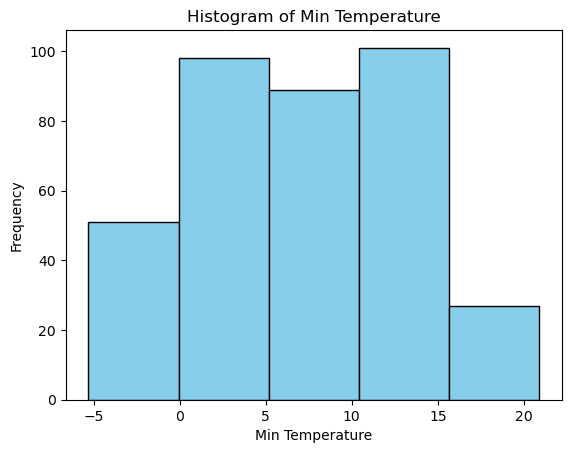

In [54]:
plt.hist(df['MinTemp'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Min Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Min Temperature')
plt.show()

Find out the correlation between variables in the given data set correlation between different variables

C:\Users\Revathi\AppData\Local\Temp\ipykernel_20876\183792097.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

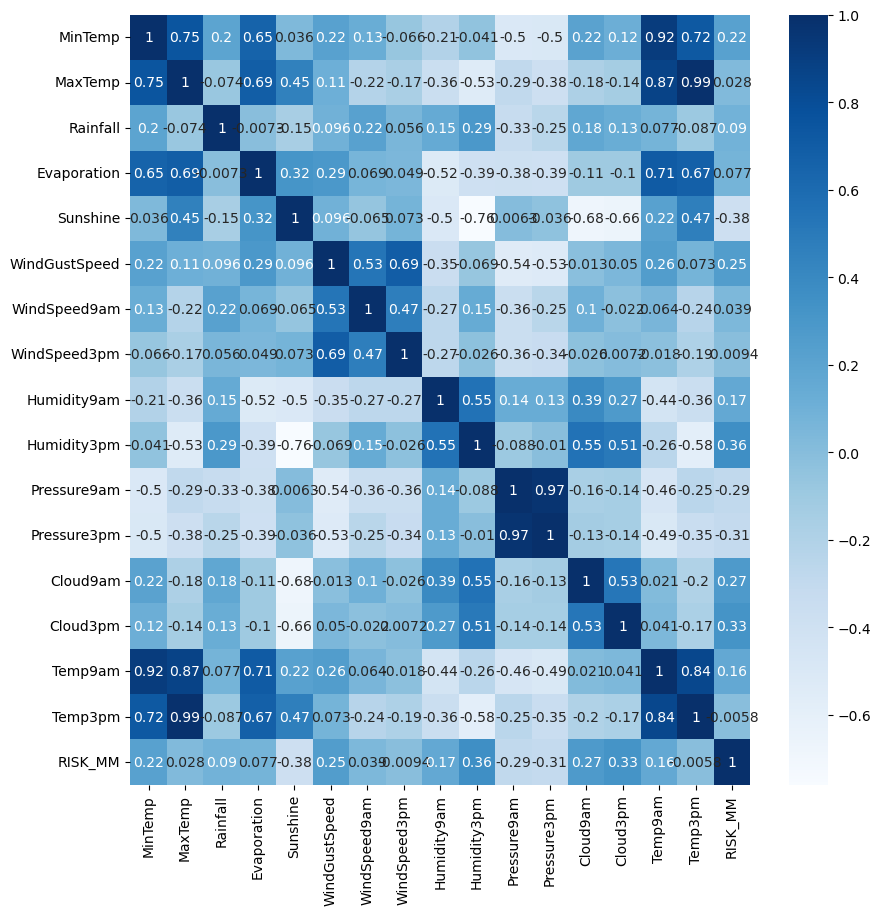

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

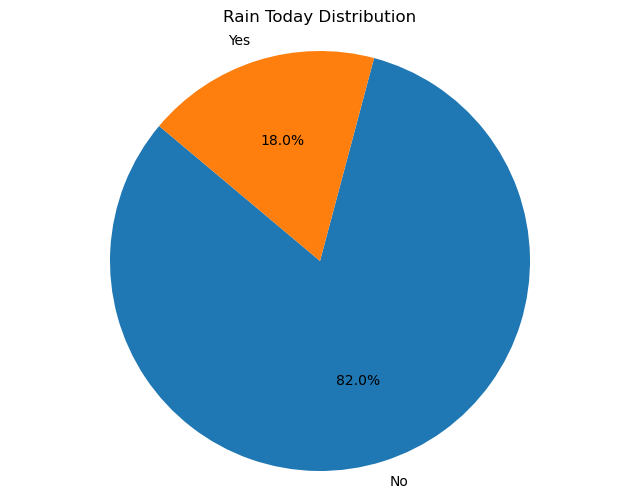

In [67]:
plt.figure(figsize=(8, 6))
rain_today_counts = df['RainToday'].value_counts()
plt.pie(rain_today_counts, labels=rain_today_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rain Today Distribution')
plt.axis('equal')
plt.show()

<Axes: xlabel='RainToday', ylabel='Count'>

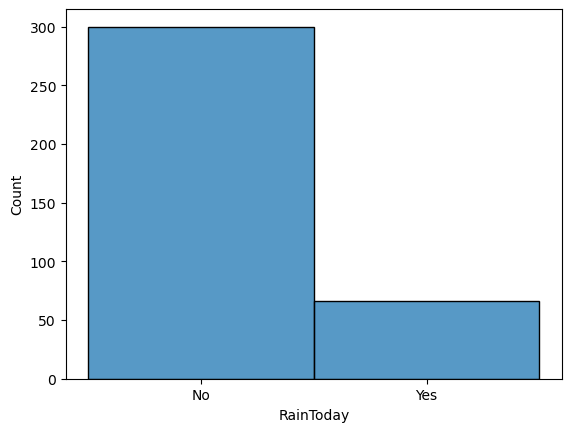

In [70]:
sns.histplot(df.RainToday,bins=2)

Rainfall Prediction

In [72]:
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')



Mean Squared Error for Rainfall Prediction: 37.076845600582615
